In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
X_cancer = df.iloc[:,2:]
X_cancer = X_cancer.drop("Unnamed: 32",axis=1)
y_cancer = df.loc[:,'diagnosis']

In [5]:
X_cancer_mean = X_cancer.iloc[:,:10]
X_cancer_se = X_cancer.iloc[:,10:20]
X_cancer_worst = X_cancer.iloc[:, 20:30]



Number of Malignant: 212
Number of Benign: 357


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


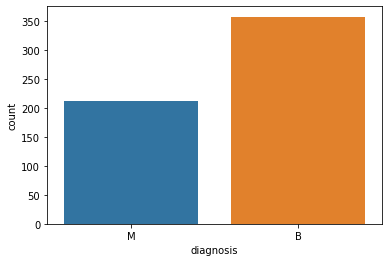

In [6]:
print("Number of Malignant: " + str(sum(x == 'M' for x in y_cancer)))
print("Number of Benign: " + str(sum(x == 'B' for x in y_cancer)))

ax = sns.countplot(y_cancer, label="Count")


In [7]:
def normalize(data):
    data_return = (data - data.mean()) / (data.std())
    return data_return

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

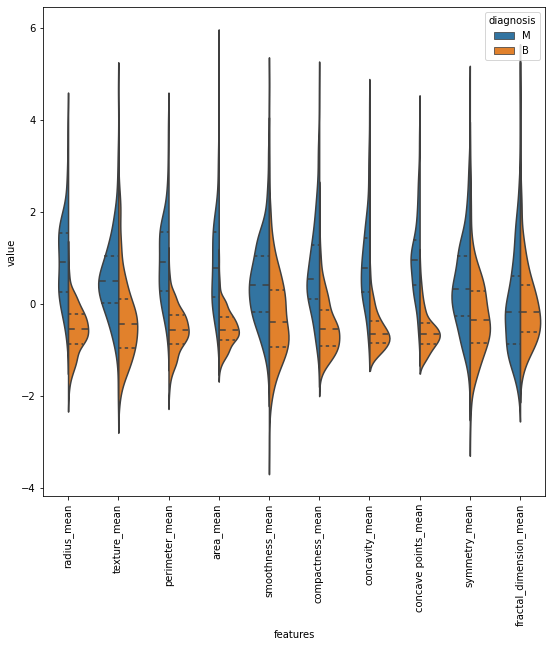

In [8]:
X_cancer_norm = normalize(X_cancer)

data = pd.concat([y_cancer,X_cancer_norm.iloc[:,0:10]],axis=1)
data = pd.melt(data, id_vars="diagnosis",
                              var_name="features",value_name='value')
plt.figure(figsize=(9,9))
sns.violinplot(x="features", y="value", data = data, inner="quart",
              split=True, hue="diagnosis")
plt.xticks(rotation=90)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

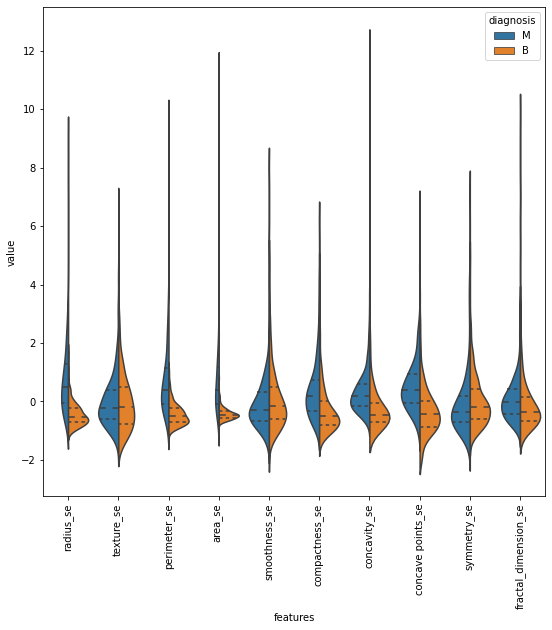

In [9]:
data = pd.concat([y_cancer,X_cancer_norm.iloc[:,10:20]],axis=1)
data = pd.melt(data, id_vars="diagnosis",
                              var_name="features",value_name='value')
plt.figure(figsize=(9,9))
sns.violinplot(x="features", y="value", data = data, inner="quart",
              split=True, hue="diagnosis")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

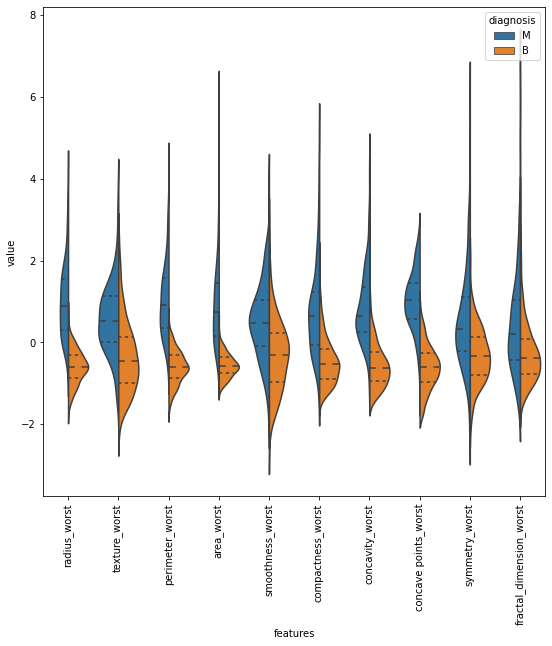

In [10]:
data = pd.concat([y_cancer,X_cancer_norm.iloc[:,20:30]],axis=1)
data = pd.melt(data, id_vars="diagnosis",
                              var_name="features",value_name='value')
plt.figure(figsize=(9,9))
sns.violinplot(x="features", y="value", data = data, inner="quart",
              split=True, hue="diagnosis")
plt.xticks(rotation=90)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


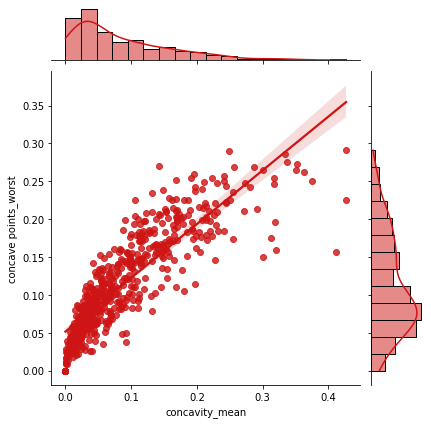

In [11]:
sns.jointplot(X_cancer.loc[:,'concavity_mean'], X_cancer.loc[:,'concave points_worst'], kind="reg", color="#ce1414")


<AxesSubplot:>

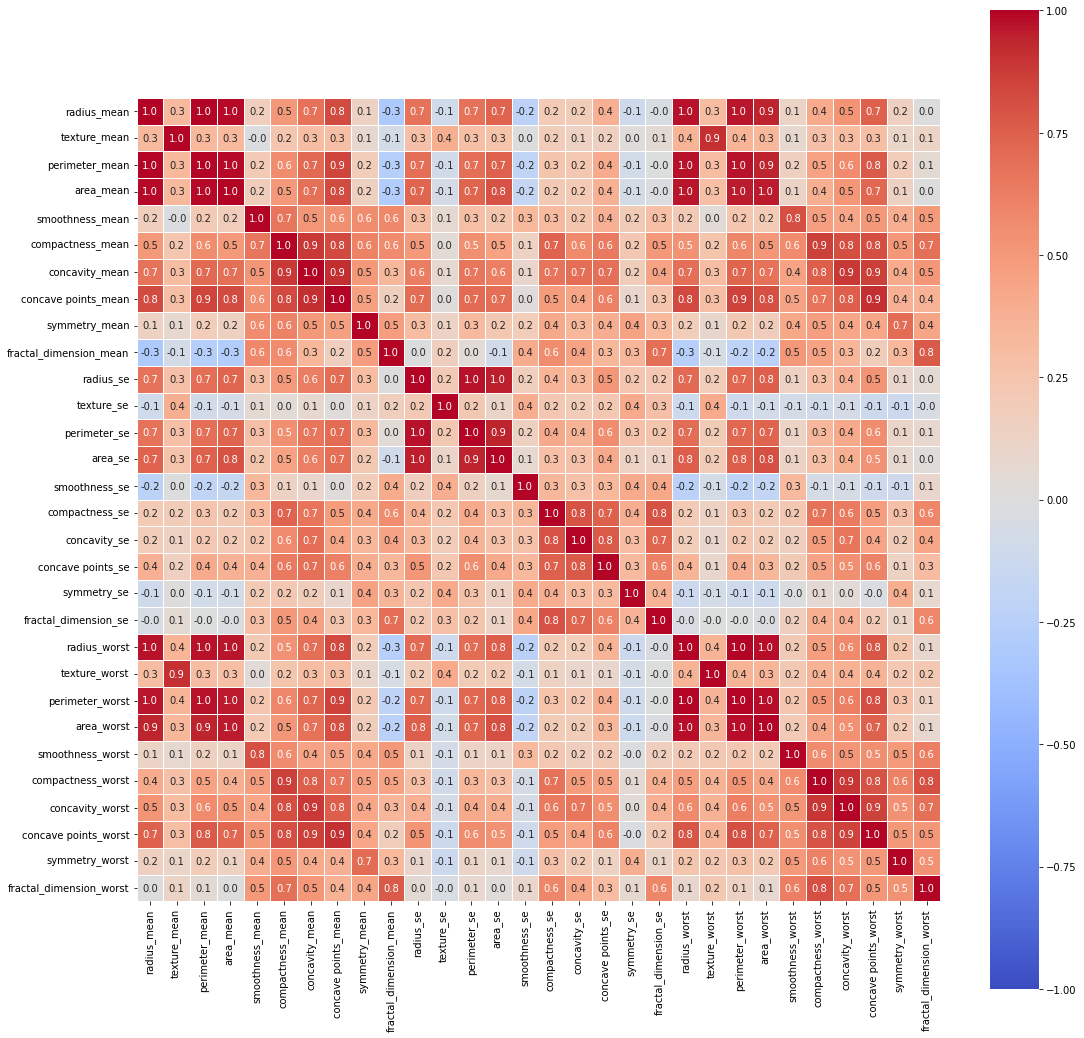

In [12]:
f, ax = plt.subplots(figsize=(18 ,18))
corr = X_cancer.corr()
sns.heatmap(corr,
    cmap="coolwarm",
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, annot=True, linewidths=.5, fmt= '.1f')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 53.4% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

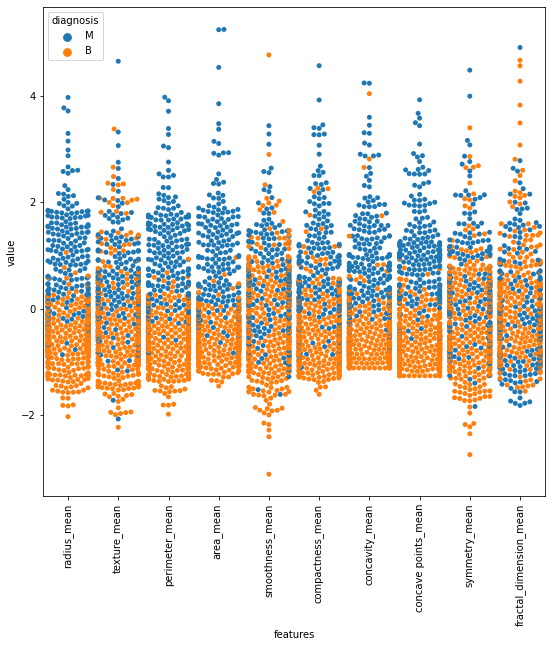

In [13]:
data = pd.concat([y_cancer,X_cancer_norm.iloc[:,0:10]],axis=1)
data = pd.melt(data, id_vars="diagnosis",
                              var_name="features",value_name='value')
plt.figure(figsize=(9,9))
sns.swarmplot(x="features", y="value", data = data, hue="diagnosis")
plt.xticks(rotation=90)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 68.5% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

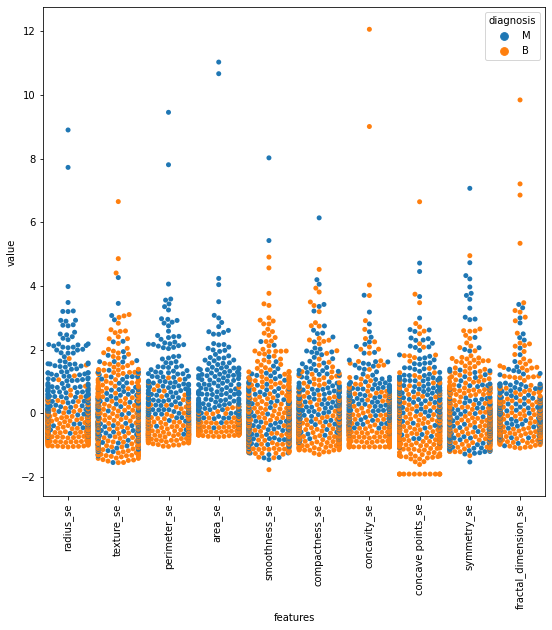

In [14]:
data = pd.concat([y_cancer,X_cancer_norm.iloc[:,10:20]],axis=1)
data = pd.melt(data, id_vars="diagnosis",
                              var_name="features",value_name='value')
plt.figure(figsize=(9,9))
sns.swarmplot(x="features", y="value", data = data, hue="diagnosis")
plt.xticks(rotation=90)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 59.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 51.3% of the points cannot be placed; y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

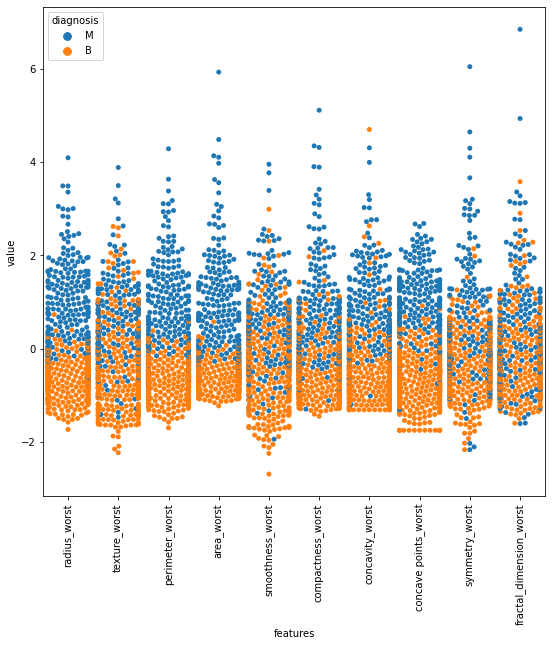

In [15]:
data = pd.concat([y_cancer,X_cancer_norm.iloc[:,20:30]],axis=1)
data = pd.melt(data, id_vars="diagnosis",
                              var_name="features",value_name='value')
plt.figure(figsize=(9,9))
sns.swarmplot(x="features", y="value", data = data, hue="diagnosis")
plt.xticks(rotation=90)

In [16]:
drop_list = ['radius_mean','perimeter_worst','area_worst','smoothness_mean'
             ,'perimeter_mean','texture_worst','compactness_worst','compactness_mean',
             'concavity_worst','concave points_mean', 'perimeter_se', 'radius_se']
X_filtered = X_cancer.drop(drop_list,axis=1)


<AxesSubplot:>

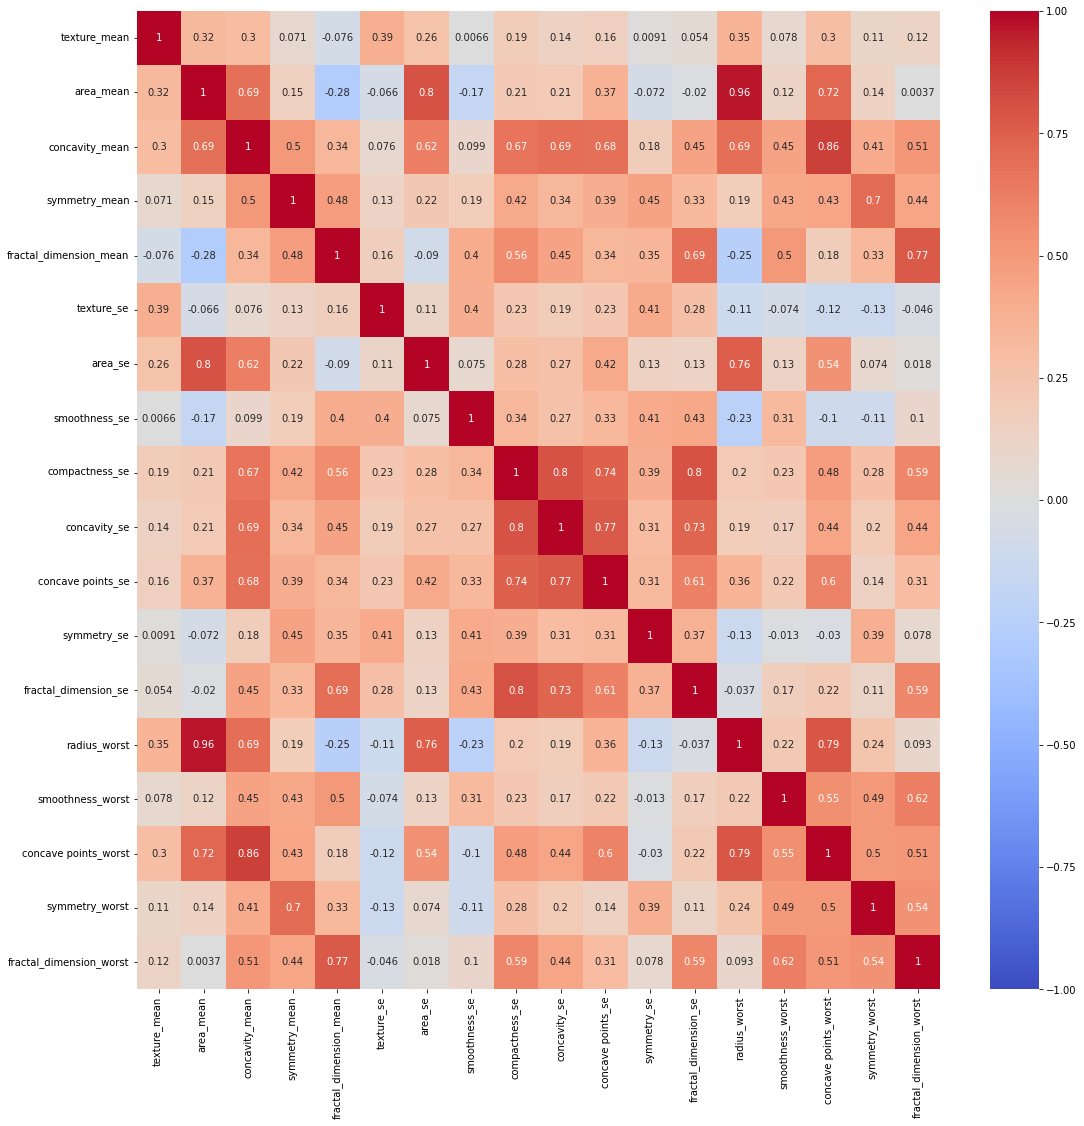

In [17]:
plt.figure(figsize=(18,18))
corr = X_filtered.corr()
sns.heatmap(corr, vmin=-1.0, vmax= 1.0, cmap= 'coolwarm', annot=True)

accuracy score: 0.9649122807017544


<AxesSubplot:>

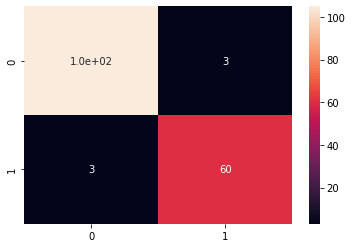

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered,y_cancer, test_size=0.3,
                                                   random_state=42)

clf = RandomForestClassifier(random_state=43)
clr = clf.fit(X_train, y_train)

score = accuracy_score(y_test, clr.predict(X_test))
print("accuracy score:", score)

mat = confusion_matrix(y_test, clr.predict(X_test))
sns.heatmap(mat, annot=True)


In [19]:
from sklearn.feature_selection import SelectKBest, chi2

bestKFeatures = SelectKBest(chi2, k=5).fit(X_train, y_train)

print('Score list:', bestKFeatures.scores_)
print('Feature list:', X_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.30547650e+01 1.95982847e-01
 3.42575072e-04 4.07131026e-02 6.12741067e+03 1.32470372e-03
 3.74071521e-01 6.92896719e-01 2.01587194e-01 1.39557806e-03
 2.65927071e-03 3.25782599e+02 2.63226314e-01 8.90751003e+00
 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'smoothness_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [20]:
score_frame = pd.DataFrame(bestKFeatures.scores_, X_train.columns)
score_frame

,0
texture_mean,60.691643
area_mean,36689.955660
concavity_mean,13.054765
symmetry_mean,0.195983
fractal_dimension_mean,0.000343
texture_se,0.040713
area_se,6127.410670
smoothness_se,0.001325
compactness_se,0.374072
concavity_se,0.692897


Score =  0.9707602339181286


<AxesSubplot:>

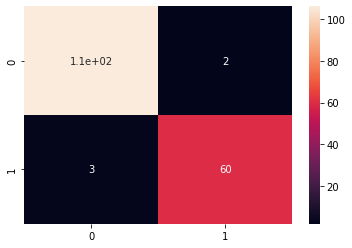

In [21]:
X_train_2 = bestKFeatures.transform(X_train)
X_test_2 = bestKFeatures.transform(X_test)

clf_2 = RandomForestClassifier()
clr_2= clf_2.fit(X_train_2, y_train)

score = accuracy_score(y_test, clr_2.predict(X_test_2))
print("Score = ", score)

mat = confusion_matrix(y_test, clr_2.predict(X_test_2))
sns.heatmap(mat, annot=True)

**RFE**

In [22]:
from sklearn.feature_selection import RFE

clf_3 = RandomForestClassifier()
rfe = RFE(clf_3, n_features_to_select = 5, step = 1)
rfe = rfe.fit(X_train, y_train)

print(X_train.columns[rfe.support_])

Index(['area_mean', 'concavity_mean', 'area_se', 'radius_worst',
       'concave points_worst'],
      dtype='object')


Score =  0.9532163742690059


<AxesSubplot:>

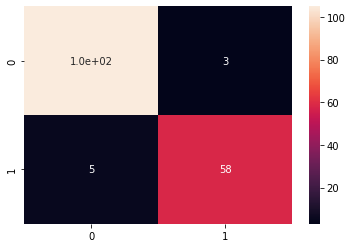

In [23]:
X_train_4 = rfe.transform(X_train)
X_test_4 = rfe.transform(X_test)

clf_4 = RandomForestClassifier()
clr_4= clf_4.fit(X_train_4, y_train)

score = accuracy_score(y_test, clr_4.predict(X_test_4))
print("Score = ", score)

mat = confusion_matrix(y_test, clr_4.predict(X_test_4))
sns.heatmap(mat, annot=True)

**RFE with CV**

In [24]:
from sklearn.feature_selection import RFECV

clf_5 = RandomForestClassifier()
refcv = RFECV(clf_5,step=1, scoring= 'accuracy', cv=2)
refcv = refcv.fit(X_train,y_train)

print("Number of features: " , refcv.n_features_)
print("best features: ", X_train.columns[refcv.support_])

Number of features:  13
best features:  Index(['texture_mean', 'area_mean', 'concavity_mean', 'fractal_dimension_mean',
       'area_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se',
       'radius_worst', 'smoothness_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


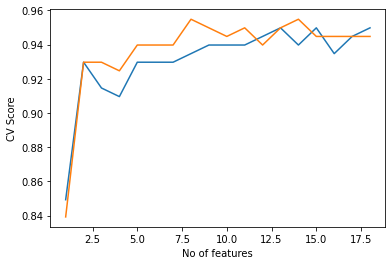

In [25]:
plt.figure()

plt.xlabel("No of features")
plt.ylabel("CV Score")
plt.plot(range(1, len(refcv.grid_scores_) + 1), refcv.grid_scores_)
plt.show()


Feature ranking:
1. feature 15 (0.215321)
2. feature 13 (0.197443)
3. feature 2 (0.169671)
4. feature 6 (0.108587)
5. feature 1 (0.090801)
6. feature 16 (0.037105)
7. feature 0 (0.034192)
8. feature 10 (0.030576)
9. feature 14 (0.022980)
10. feature 17 (0.012478)
11. feature 4 (0.012114)
12. feature 8 (0.011277)
13. feature 12 (0.010638)
14. feature 9 (0.010244)
15. feature 5 (0.010196)
16. feature 11 (0.009952)
17. feature 7 (0.009085)
18. feature 3 (0.007340)


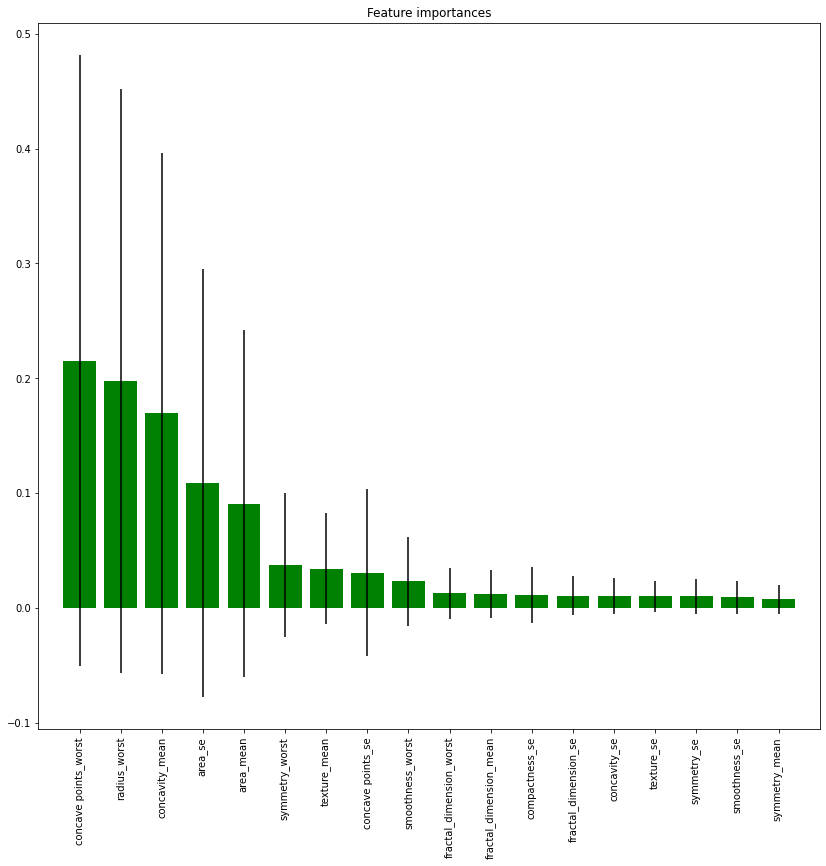

In [26]:
clf_6 = RandomForestClassifier()      
clr_6 = clf_6.fit(X_train,y_train)
importances = clr_6.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_6.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

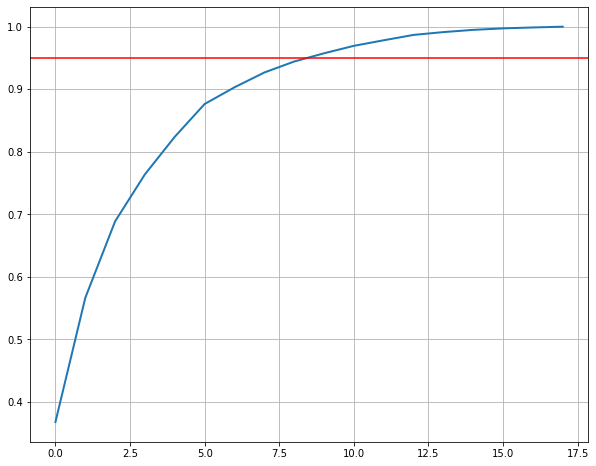

In [30]:
from sklearn.decomposition import PCA

X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

pca = PCA()
pca.fit(X_train_norm)
cumsum = np.cumsum(pca.explained_variance_ratio_)
features_in_order = np.argsort(pca.explained_variance_ratio_)


plt.figure(figsize=(10,8))
plt.grid()
plt.plot(cumsum, linewidth=2)
plt.axhline(y=0.95, color='r')



Score =  0.9122807017543859


<AxesSubplot:>

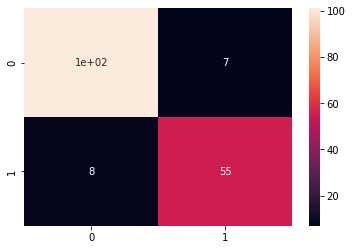

In [31]:
X_train_6 = pca.transform(X_train)
X_test_6 = pca.transform(X_test)

clf_6 = RandomForestClassifier()
clr_6= clf_6.fit(X_train_6, y_train)

score = accuracy_score(y_test, clr_6.predict(X_test_6))
print("Score = ", score)

mat = confusion_matrix(y_test, clr_6.predict(X_test_6))
sns.heatmap(mat, annot=True)

<font size = "5"> SVM </font>

In [48]:
features = ['area_mean', 'area_se', 'radius_worst', 'texture_mean', 'concavity_mean',
              'concave points_worst']
X = X_cancer[['area_mean', 'area_se', 'radius_worst', 'texture_mean', 'concavity_mean',
              'concave points_worst']]


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cancer, test_size=0.3)

In [50]:
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

clf = SVC()
#param_list = ['C' : range(0,5,0.1), 'gamma':[1,0,0.1,0.01, 0.001],
            #  'kernel':['rbf', 'poly','linear','sigmoid']]
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(clf, param_grid)
grid.fit(X_train_norm, y_train)
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


In [52]:
from sklearn.svm import SVC


svm = SVC(C=10, probability=True, gamma=0.1)
svm.fit(X_train_norm ,y_train)

print("train score: ", svm.score(X_train_norm,y_train))
print("test score: ", svm.score(X_test_norm,y_test))

train score:  0.9748743718592965
test score:  0.9590643274853801


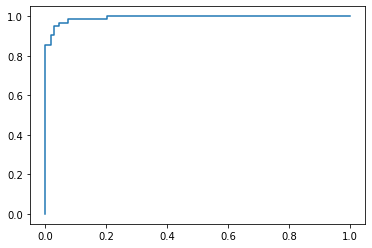

auc score:  0.9926013613495117


In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = svm.predict_proba(X_test_norm)

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1], pos_label = 'M')
plt.plot(fpr, tpr)
plt.show()

auc_score = roc_auc_score(y_test, y_scores[:,1])
print("auc score: ", auc_score)

<font size = "5"> Decision Tree Classifier </font>

In [54]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
param_grid = {'max_depth' : [1,2,3,4,5,6,7,8,9],
              'max_leaf_nodes' : list(range(2,100,1)) }

grid = GridSearchCV(clf, param_grid)
grid.fit(X_train_norm, y_train)
print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20)


In [55]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_depth=4, max_leaf_nodes = 13)
clf_dt.fit(X_train_norm, y_train)

print("Train score = ", clf_dt.score(X_train_norm, y_train))
print("Test score = ", clf_dt.score(X_test_norm, y_test))

Train score =  0.9874371859296482
Test score =  0.9239766081871345


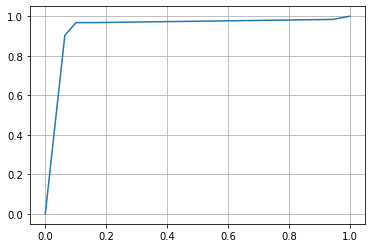

auc score:  0.941106836342113


In [56]:
y_scores = clf_dt.predict_proba(X_test_norm)

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1], pos_label = 'M')
plt.plot(fpr, tpr)
plt.grid()
plt.show()

auc_score = roc_auc_score(y_test, y_scores[:,1])
print("auc score: ", auc_score)

<font size = "5"> Logistic Regression </font>

In [57]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(penalty="l2")
clf_lr.fit(X_train_norm, y_train)

LogisticRegression()

In [58]:
print("train score: " , clf_lr.score(X_train_norm, y_train))
print("test score: ", clf_lr.score(X_test_norm, y_test))

train score:  0.9673366834170855
test score:  0.9590643274853801


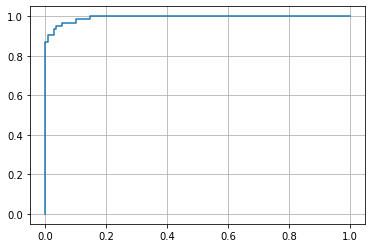

auc score:  0.9933412252145606


In [59]:
y_scores = clf_lr.predict_proba(X_test_norm)

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1], pos_label = 'M')
plt.plot(fpr, tpr)
plt.grid()
plt.show()

auc_score = roc_auc_score(y_test, y_scores[:,1])
print("auc score: ", auc_score)

<font size = "5">  KNN Classifier </font>

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors' : list(range(1,20,1))}
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, param_grid)

grid.fit(X_train_norm, y_train)
print(grid.best_estimator_)


KNeighborsClassifier(n_neighbors=7)


In [61]:
clf_knn = KNeighborsClassifier(n_neighbors = 7)
clf_knn.fit(X_train_norm, y_train)

print("train score: ", clf_knn.score(X_train_norm, y_train))
print("test score: ", clf_knn.score(X_test_norm, y_test))

train score:  0.964824120603015
test score:  0.9532163742690059


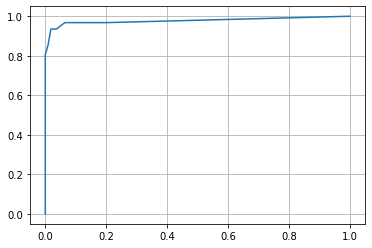

auc score:  0.9776561112755254


In [62]:
y_scores = clf_knn.predict_proba(X_test_norm)

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1], pos_label = 'M')
plt.plot(fpr, tpr)
plt.grid()
plt.show()

auc_score = roc_auc_score(y_test, y_scores[:,1])
print("auc score: ", auc_score)